# v1 survey data experiments

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sample_df = pd.read_csv('../data/v1-sample.csv')
sample_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q_residence_type_3_TEXT,Q_state,Q_comments,online_shopping,takeout_food_delivery,online_groceries,prescription_medications_delivery,last_minute_groceries_delivery,liquor_store_delivery,questions_asked
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,What type of residence do you live in? - Other...,"50 States, D.C. and Puerto Rico",Any extra comments? Was anything unclear? (opt...,online_shopping,takeout_food_delivery,online_groceries,prescription_medications_delivery,last_minute_groceries_delivery,liquor_store_delivery,questions_asked
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID10_4_TEXT""}","{""ImportId"":""QID40""}","{""ImportId"":""QID253_TEXT""}","{""ImportId"":""online_shopping""}","{""ImportId"":""takeout_food_delivery""}","{""ImportId"":""online_groceries""}","{""ImportId"":""prescription_medications_delivery""}","{""ImportId"":""last_minute_groceries_delivery""}","{""ImportId"":""liquor_store_delivery""}","{""ImportId"":""questions_asked""}"
2,2022-07-10 06:03:28,2022-07-10 06:04:06,1,*******,100,37,1,2022-07-10 06:04:06,R_2TNWokQuEKgLyI5,*******,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-10 06:04:17,2022-07-10 06:04:32,1,*******,100,15,1,2022-07-10 06:04:33,R_1pVCqlWH6WIngxx,*******,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-10 09:18:32,2022-07-10 09:25:29,0,*******,100,417,1,2022-07-10 09:25:35,R_2TATfk3xTDOFrGS,*******,...,NaN,22,This is alex first test,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# print(list(sample_df.columns))

In [4]:
choice_Qs = [q for q in sample_df.columns if (q.startswith('CHOICE_'))]
print('%s total choice questions' % len(choice_Qs))
# print(choice_Qs)
sample_df[choice_Qs].drop([1]).head()

400 total choice questions


,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt1_dc1_dt0_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp1_1,CHOICE_v0_gc0_gt2_dc0_dt1_dp0_1,CHOICE_v0_gc0_gt2_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt2_dc1_dt0_dp1_1,CHOICE_v0_gc0_gt2_dc1_dt2_dp1_1,...,CHOICE_v3_gc3_gt2_dc1_dt2_dp1_1,CHOICE_v3_gc3_gt2_dc2_dt2_dp1_1,CHOICE_v3_gc3_gt2_dc3_dt0_dp1_1,CHOICE_v3_gc3_gt2_dc3_dt1_dp0_1,CHOICE_v3_gc3_gt2_dc3_dt3_dp0_1,CHOICE_v3_gc3_gt2_dc3_dt3_dp1_1,CHOICE_v3_gc3_gt3_dc2_dt3_dp0_1,CHOICE_v3_gc3_gt3_dc3_dt1_dp1_1,CHOICE_v3_gc3_gt3_dc3_dt2_dp1_1,CHOICE_v3_gc3_gt3_dc3_dt3_dp0_1
0,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,Suppose you order take-out food for delivery t...,...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...,Suppose you order last-minute groceries for de...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
non_choice_Qs = [q for q in sample_df.columns if (q.startswith('Q-') or q.startswith('Q_'))]
print(list(non_choice_Qs))
sample_df[non_choice_Qs].drop([1]).head()

['Q-attn-number-21', 'Q_online_shopping', 'Q_takeout_food', 'Q_online_groceries', 'Q_habits_attn_check', 'Q_v_0_why_no', 'Q_v_0_why_no_4_TEXT', 'Q_v_1', 'Q_v_1_why_no', 'Q_v_1_why_no_4_TEXT', 'Q_v_2', 'Q_v_2_why_no', 'Q_v_2_why_no_4_TEXT', 'Q_v_attn_check_1', 'Q_gender', 'Q_age', 'Q_race', 'Q_income', 'Q_urban_rural', 'Q_residence_type', 'Q_residence_type_3_TEXT', 'Q_state', 'Q_comments']


,Q-attn-number-21,Q_online_shopping,Q_takeout_food,Q_online_groceries,Q_habits_attn_check,Q_v_0_why_no,Q_v_0_why_no_4_TEXT,Q_v_1,Q_v_1_why_no,Q_v_1_why_no_4_TEXT,...,Q_v_attn_check_1,Q_gender,Q_age,Q_race,Q_income,Q_urban_rural,Q_residence_type,Q_residence_type_3_TEXT,Q_state,Q_comments
0,Please select the number shown.,How often (on average) do you make online shop...,How often (on average) do you have take-out fo...,How often (on average) do you purchase your gr...,How closely are you paying attention? This is ...,What are your reasons for never ordering t...,What are your reasons for never ordering t...,Suppose there is a company that specializes in...,What are your reasons for never ordering m...,What are your reasons for never ordering m...,...,Suppose this is an attention check. Given this...,What is your gender?,What is your age?,Choose one or more races that you consider you...,What was your entire household income in the p...,Which best describes where you live?,What type of residence do you live in? - Selec...,What type of residence do you live in? - Other...,"50 States, D.C. and Puerto Rico",Any extra comments? Was anything unclear? (opt...
2,21,5,1,5,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,5,1,3,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,4,4,5,"1,2,3,4,5",NaN,NaN,3,NaN,NaN,...,"0,1",2,2,1,2,1,2,NaN,22,This is alex first test
5,21,4,5,5,"1,2,3,4,5",1,NaN,3,NaN,NaN,...,"0,1",2,4,1,2,1,2,NaN,22,alex test 2


In [6]:
respondent_columns = [
    'ResponseId', 
    #'PROLIFIC_PID', 
    'Finished',
    'Duration (in seconds)', 'RecordedDate',
]
respondent_df = sample_df.drop([0,1])[respondent_columns + non_choice_Qs]
starting_respondent_N = respondent_df['ResponseId'].nunique()
print('N=%s total responses before data cleaning' % starting_respondent_N)
respondent_df.head(3)

N=75 total responses before data cleaning


,ResponseId,Finished,Duration (in seconds),RecordedDate,Q-attn-number-21,Q_online_shopping,Q_takeout_food,Q_online_groceries,Q_habits_attn_check,Q_v_0_why_no,...,Q_v_attn_check_1,Q_gender,Q_age,Q_race,Q_income,Q_urban_rural,Q_residence_type,Q_residence_type_3_TEXT,Q_state,Q_comments
2,R_2TNWokQuEKgLyI5,1,37,2022-07-10 06:04:06,21,5,1,5,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R_1pVCqlWH6WIngxx,1,15,2022-07-10 06:04:33,12,5,1,3,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R_2TATfk3xTDOFrGS,1,417,2022-07-10 09:25:35,21,4,4,5,"1,2,3,4,5",NaN,...,"0,1",2,2,1,2,1,2,NaN,22,This is alex first test


In [7]:
# For setting this up with Prolific later
# only include completed surveys via Prolific
# N_PROLIFIC_PID_na = len(respondent_df[respondent_df['PROLIFIC_PID'].isna()])
# print('dropping %s non PROLIFIC responses' % N_PROLIFIC_PID_na)
# respondent_df = respondent_df[respondent_df['PROLIFIC_PID'].notna()]
# N_uncompleted = len(respondent_df[respondent_df['Finished'] != '1'])
# respondent_df = respondent_df[respondent_df['Finished'] == '1']
# print('dropping %s incomplete responses' % N_uncompleted)

In [8]:
def passed_attn_checks(row):
    if row['Q-attn-number-21'] != '21':
        print(row['ResponseId'], 'failed Q-attn-number-21')
        return False
    if len(row['Q_habits_attn_check'].split(',')) != 5:
        print(row['ResponseId'], 'failed Q_habits_attn_check')
        return False
    if row['Q_v_attn_check_1'] in ['1','2']: # only selected 1 option - either 1 or 2
        print(row['ResponseId'], 'failed Q_v_attn_check_1')
        return False
    return True

In [9]:
respondent_df['passed_attn_checks'] = respondent_df.apply(passed_attn_checks, axis=1)
passed_attn_checks_ResponseId_list = list(respondent_df[respondent_df.passed_attn_checks == True].ResponseId)
print('%s/%s respondents passed all attention checks' % (len(passed_attn_checks_ResponseId_list), len(respondent_df)))
# passed_attn_checks_ResponseId_list

R_2TNWokQuEKgLyI5 failed Q_habits_attn_check
R_1pVCqlWH6WIngxx failed Q-attn-number-21
R_2tEhfkcXwj6jbuW failed Q-attn-number-21
R_1DqYrbH2AQ1L8Bi failed Q-attn-number-21
R_2Uf4ipCF6K6Atp4 failed Q-attn-number-21
R_1CvUbPGUpKIsyND failed Q-attn-number-21
R_3jfH9FV909ThGmt failed Q-attn-number-21
R_2sZQkfJ3e5mn7ZI failed Q-attn-number-21
R_3EXVRzRDcNqQn6k failed Q_v_attn_check_1
R_1NzcbhkWJ1Coz0W failed Q_habits_attn_check
R_23rd6s0EBHKulup failed Q-attn-number-21
R_1ISGoGUY5WD3lea failed Q-attn-number-21
R_2rqCMXu5lA54wKD failed Q_habits_attn_check
62/75 respondents passed all attention checks


Drop responses from participants who failed ANY attention check

In [10]:
print('dropping responses from participants who failed any attention check')
respondent_df = respondent_df[respondent_df['passed_attn_checks']]

dropping responses from participants who failed any attention check


### Codebook

In [11]:
# This is a dump from the recode values exported from qualtrics Q_state.
# Qualtrics put the states in alphabetical order for their recode value, did not code by FIPs
states_recode_text = '1\nAlabama\n2\nAlaska\n3\nArizona\n4\nArkansas\n5\nCalifornia\n6\nColorado\n7\nConnecticut\n8\nDelaware\n9\nDistrict of Columbia\n10\nFlorida\n11\nGeorgia\n12\nHawaii\n13\nIdaho\n14\nIllinois\n15\nIndiana\n16\nIowa\n17\nKansas\n18\nKentucky\n19\nLouisiana\n20\nMaine\n21\nMaryland\n22\nMassachusetts\n23\nMichigan\n24\nMinnesota\n25\nMississippi\n26\nMissouri\n27\nMontana\n28\nNebraska\n29\nNevada\n30\nNew Hampshire\n31\nNew Jersey\n32\nNew Mexico\n33\nNew York\n34\nNorth Carolina\n35\nNorth Dakota\n36\nOhio\n37\nOklahoma\n38\nOregon\n39\nPennsylvania\n40\nPuerto Rico\n41\nRhode Island\n42\nSouth Carolina\n43\nSouth Dakota\n44\nTennessee\n45\nTexas\n46\nUtah\n47\nVermont\n48\nVirginia\n49\nWashington\n50\nWest Virginia\n51\nWisconsin\n52\nWyoming\n53\nI do not reside in the United States'
states_recode_list = states_recode_text.split('\n')
states_choices_map = {states_recode_list[i]: states_recode_list[i+1] for i in range(0, len(states_recode_list), 2)}
# states_choices_map

In [12]:
# {QID: {Q: Q text, choices: map}}
codebook = {
    'Q_online_shopping': {
        'Q': 'How often (on average) do you make online shopping purchases?',
        'values': {
            '1':'More than once a week','2':'Multiple times a month',
            '3':'About once a month',
            '4':'Once in a few months or longer','5':'Never'
        }
    },
    'Q_takeout_food': {
        'Q': 'How often (on average) do you have take-out food delivered to your home?',
        'values': {
            '1':'More than once a week','2':'Multiple times a month',
            '3':'About once a month',
            '4':'Once in a few months or longer','5':'Never'
        }
    },
    'Q_online_groceries': {
        'Q': 'How often (on average) do you purchase your groceries online?',
        'values': {
            '1':'More than once a week','2':'Multiple times a month',
            '3':'About once a month',
            '4':'Once in a few months or longer','5':'Never'
        }
    },
    'Q_gender': {
        'Q':'What is your gender?',
        'choices': {'1':'Male','2':'Female','3':'Other', '4':'Prefer not to answer'},
    },
    'Q_age': {
        'Q': 'How old are you?',
        'choices': {
            '1':'18 - 24 years',
            '2':'25 - 34 years',
            '3':'35 - 44 years',
            '4':'45 - 54 years',
            '5':'55 - 64 years',
            '6':'65 or older'
        },
    },
    'Q_race': {
        'Q': 'Choose one or more races that you consider yourself to be',
        'choices': {
            '1':'White',
            '2':'Black or African American',
            '3':'American Indian or Alaska Native',
            '4':'Asian',
            '5':'Native Hawaiian or Pacific Islander',
            '6':'Hispanic or Latino',
            '7':'Other'
        },
    },
    'Q_income': {
        'Q': 'What was your total household income in the previous year before taxes?',
        'choices': {
            '1':'Less than \$25,000','2':'\$25,000 to \$49,999',
            '3':'\$50,000 to $74,999','4':'\$75,000 to \$99,999',
            '5':'\$100,000 to $149,999','6':'\$150,000 to \$199,999',
            '7':'\$200,000 or more',
        },
    },
    'Q_urban_rural': {
        'Q':'Which best describes where you live?',
        'choices': {'1':'Urban','2':'Suburban','3':'Rural'},
    },
    'Q_residence_type': {
        'Q':'What type of residence do you live in?',
        'choices': {'1':'Private home','2':'Apartment','3':'Other'},
    },
    'Q_state': {
        'Q':'In which state do you currently reside?',
        'choices': states_choices_map,
    },
}

## View end comments

In [13]:
comments = respondent_df.set_index('ResponseId')['Q_comments'].rename('comments').dropna()
for c in comments.to_list():
    print('"%s"\n'%c)

"This is alex first test "

"alex test 2"

"alex test when the flow was not right"

"alex test. issue: must set embedded data for questions_asked beforehand if want to use less than logic"

"alex test: I said yes to all delivery types except take-out and the logic worked"

"alex test: said no to everything except take-out food. that logic worked. but it looked like the choices automatically showed what i had most previously selected. fix?"

"karthik's test run!"

"alex testing random ordering of choice question blocks: it works"

"alex test"

"alex testing that i was shown 12 DIFFERENT meds choices -- worked"

"alex testing that 3 different vendors works -- works"



## Choices analysis

Transform wide data into long data

In [14]:
# Wide data
# drop data from respondents who failed attention checks
sample_df[
    (sample_df.ResponseId.isin(passed_attn_checks_ResponseId_list))
][['ResponseId']+choice_Qs].head(3)

,ResponseId,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt1_dc1_dt0_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp0_1,CHOICE_v0_gc0_gt1_dc2_dt1_dp1_1,CHOICE_v0_gc0_gt2_dc0_dt1_dp0_1,CHOICE_v0_gc0_gt2_dc0_dt2_dp0_1,CHOICE_v0_gc0_gt2_dc1_dt0_dp1_1,...,CHOICE_v3_gc3_gt2_dc1_dt2_dp1_1,CHOICE_v3_gc3_gt2_dc2_dt2_dp1_1,CHOICE_v3_gc3_gt2_dc3_dt0_dp1_1,CHOICE_v3_gc3_gt2_dc3_dt1_dp0_1,CHOICE_v3_gc3_gt2_dc3_dt3_dp0_1,CHOICE_v3_gc3_gt2_dc3_dt3_dp1_1,CHOICE_v3_gc3_gt3_dc2_dt3_dp0_1,CHOICE_v3_gc3_gt3_dc3_dt1_dp1_1,CHOICE_v3_gc3_gt3_dc3_dt2_dp1_1,CHOICE_v3_gc3_gt3_dc3_dt3_dp0_1
4,R_2TATfk3xTDOFrGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R_3g0N8eVsB72N0Xv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,R_25yBuVcBHE8RhP5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Transform the wide data to long data.
choices_df = pd.melt(
    sample_df[
        (sample_df.ResponseId.isin(passed_attn_checks_ResponseId_list))
    ][['ResponseId']+choice_Qs], 
    id_vars=['ResponseId'], value_vars=choice_Qs,
    var_name='QID', value_name='choice'
).dropna()
print('%s choice responses' % len(choices_df))
choices_df.head(3)    

444 choice responses


,ResponseId,QID,choice
10,R_OJUdoPVcuz25YD7,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,1
80,R_1ruHrUP2X7OZ8pT,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,0
156,R_1DJ6ctuEtduf99Y,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,0


In [16]:
choices_df['choice'] = choices_df['choice'].astype(int)
choices_df['v'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_v')[1][0]))
choices_df['gc'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_gc')[1][0]))
choices_df['gt'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_gt')[1][0]))
choices_df['dc'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_dc')[1][0]))
choices_df['dt'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_dt')[1][0]))
choices_df['dp'] =  choices_df['QID'].apply(lambda QID: int(QID.split('_dp')[1][0]))

choices_df.head(3)

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp
10,R_OJUdoPVcuz25YD7,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,1,0,0,0,0,2,0
80,R_1ruHrUP2X7OZ8pT,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,0,0,0,0,1,0,1
156,R_1DJ6ctuEtduf99Y,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,0,0,0,1,0,2,0


Add values to the question parameters



In [17]:
import sys  
sys.path.insert(0, '../survey-questions')

from attributes import (
    VENDOR_TYPES, COST_LEVELS, TIME_LEVELS, DRONE_PRIVACY_LEVELS,
)
for levels in [VENDOR_TYPES, COST_LEVELS, TIME_LEVELS, DRONE_PRIVACY_LEVELS]:
    print(levels)

[('take-out food', 'take-out food'), ('prescription medications', 'prescription medications'), ('liquor store', 'items from a liquor store'), ('last-minute groceries', 'last-minute groceries')]
[[(0, '$0'), (1, '$1'), (3, '$3'), (5, '$5')], [(0, '$0'), (1, '$1'), (5, '$5'), (10, '$10')], [(0, '$0'), (1, '$1'), (3, '$3'), (5, '$5')], [(0, '$0'), (1, '$1'), (3, '$3'), (5, '$5')]]
[[(15, '15 minutes'), (20, '20 minutes'), (30, '30 minutes'), (45, '45 minutes')], [(30, '30 minutes'), (120, '2 hrs'), (360, '6 hrs'), (1440, '1 day')], [(15, '15 minutes'), (20, '20 minutes'), (30, '30 minutes'), (45, '45 minutes')], [(15, '15 minutes'), (20, '20 minutes'), (30, '30 minutes'), (45, '45 minutes')]]
[(0, 'NO privacy'), (1, 'YES privacy')]


In [18]:
choices_df['v_type'] = choices_df['v'].apply(lambda v: VENDOR_TYPES[v][0])
choices_df['g_cost'] = choices_df.apply(lambda row: COST_LEVELS[row['v']][row['gc']][0],axis=1)
choices_df['d_cost'] = choices_df.apply(lambda row: COST_LEVELS[row['v']][row['dc']][0],axis=1)
choices_df['g_time'] = choices_df.apply(lambda row: TIME_LEVELS[row['v']][row['gt']][0],axis=1)
choices_df['d_time'] = choices_df.apply(lambda row: TIME_LEVELS[row['v']][row['dt']][0],axis=1)
choices_df['d_privacy'] = choices_df.apply(lambda row: DRONE_PRIVACY_LEVELS[row['dp']][0],axis=1)
choices_df.head(3)

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,v_type,g_cost,d_cost,g_time,d_time,d_privacy
10,R_OJUdoPVcuz25YD7,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,1,0,0,0,0,2,0,take-out food,0,0,15,30,0
80,R_1ruHrUP2X7OZ8pT,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,0,0,0,0,1,0,1,take-out food,0,1,15,15,1
156,R_1DJ6ctuEtduf99Y,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,0,0,0,1,0,2,0,take-out food,0,0,20,30,0


In [19]:
# add in extra for evaluating trade-offs
choices_df['d_time - g_time'] = choices_df['d_time'] - choices_df['g_time']
choices_df['d_cost - g_cost'] = choices_df['d_cost'] - choices_df['g_cost']
choices_df.head(3)

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,v_type,g_cost,d_cost,g_time,d_time,d_privacy,d_time - g_time,d_cost - g_cost
10,R_OJUdoPVcuz25YD7,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,1,0,0,0,0,2,0,take-out food,0,0,15,30,0,15,0
80,R_1ruHrUP2X7OZ8pT,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,0,0,0,0,1,0,1,take-out food,0,1,15,15,1,0,1
156,R_1DJ6ctuEtduf99Y,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,0,0,0,1,0,2,0,take-out food,0,0,20,30,0,10,0


In [20]:
color_ground = 'blue'
color_drone = 'red'

def plot_points_tradeoff(df, vendor):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    for dp, privacy in enumerate(DRONE_PRIVACY_LEVELS):
        ax = axes[dp]
        df_p = df[df['dp']==dp]
        df_p_choice_ground = df_p[df_p['choice'] == 0]
        df_p_choice_drone = df_p[df_p['choice'] == 1]
        ax.scatter(
            df_p_choice_ground['d_time - g_time'],
            df_p_choice_ground['d_cost - g_cost'],
            color=color_ground, alpha=0.5, label='choice: drone',
            marker='o',
        )
        ax.scatter(
            df_p_choice_drone['d_time - g_time'],
            df_p_choice_drone['d_cost - g_cost'],
            color=color_drone, alpha=0.5, label='choice: ground vehicle',
            marker='o',
        )   
        ax.set_xlabel('drone wait time - ground vehicle wait time (mins)')
        ax.set_ylabel('drone cost - ground vehicle cost (\$)')
        ax.axvline(c='grey', lw=1)
        _ = ax.axhline(c='grey', lw=1)
        _ = ax.set_title(privacy[1])
        ax.legend()
    title = ('%s: Ground vehicle vs Drone choice differences w.r.t. cost and time' % vendor)
    _ = fig.suptitle(title)

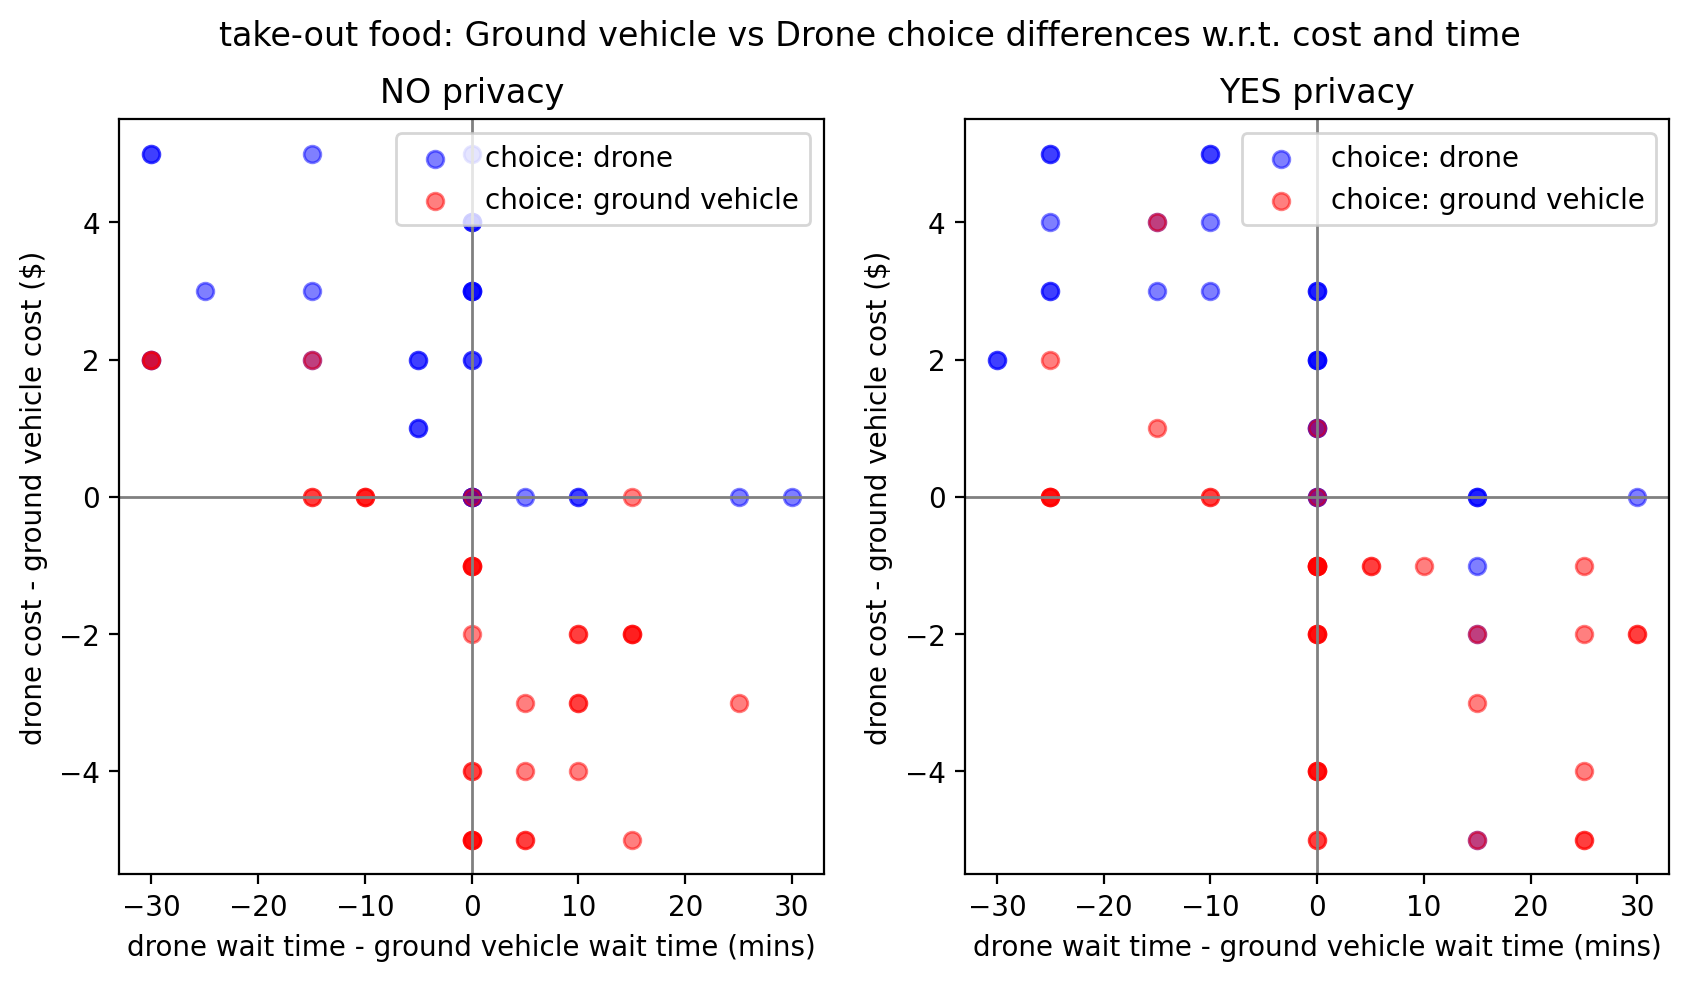

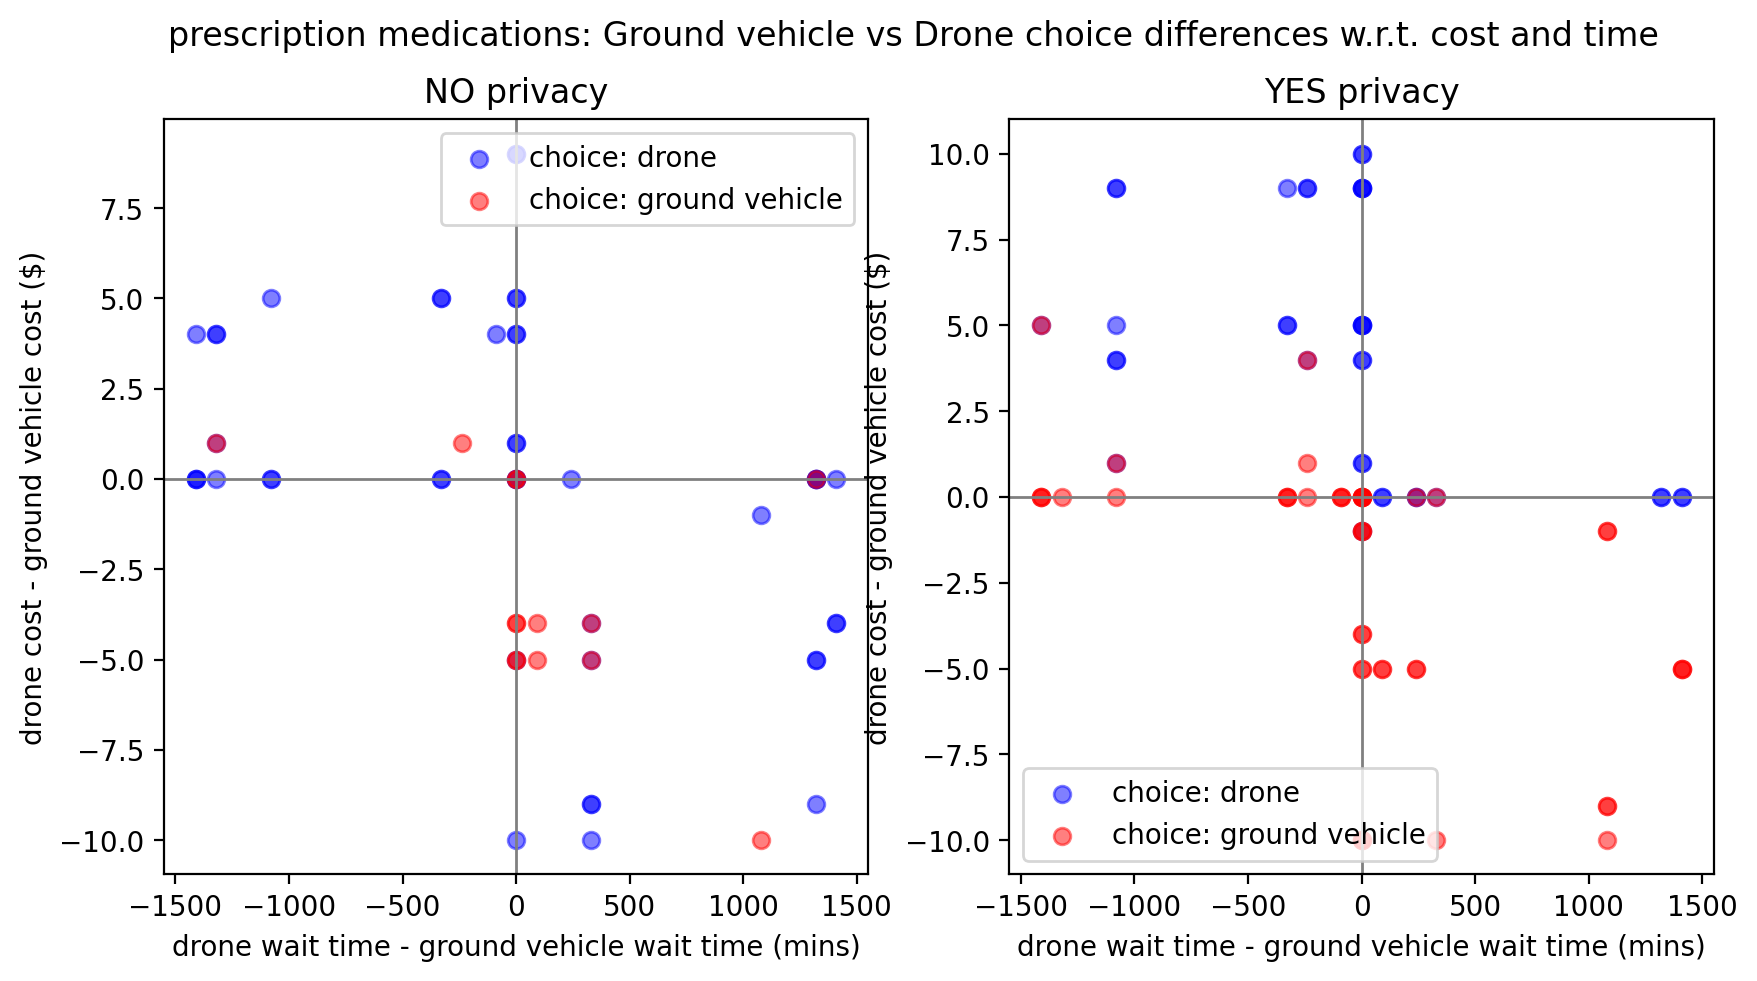

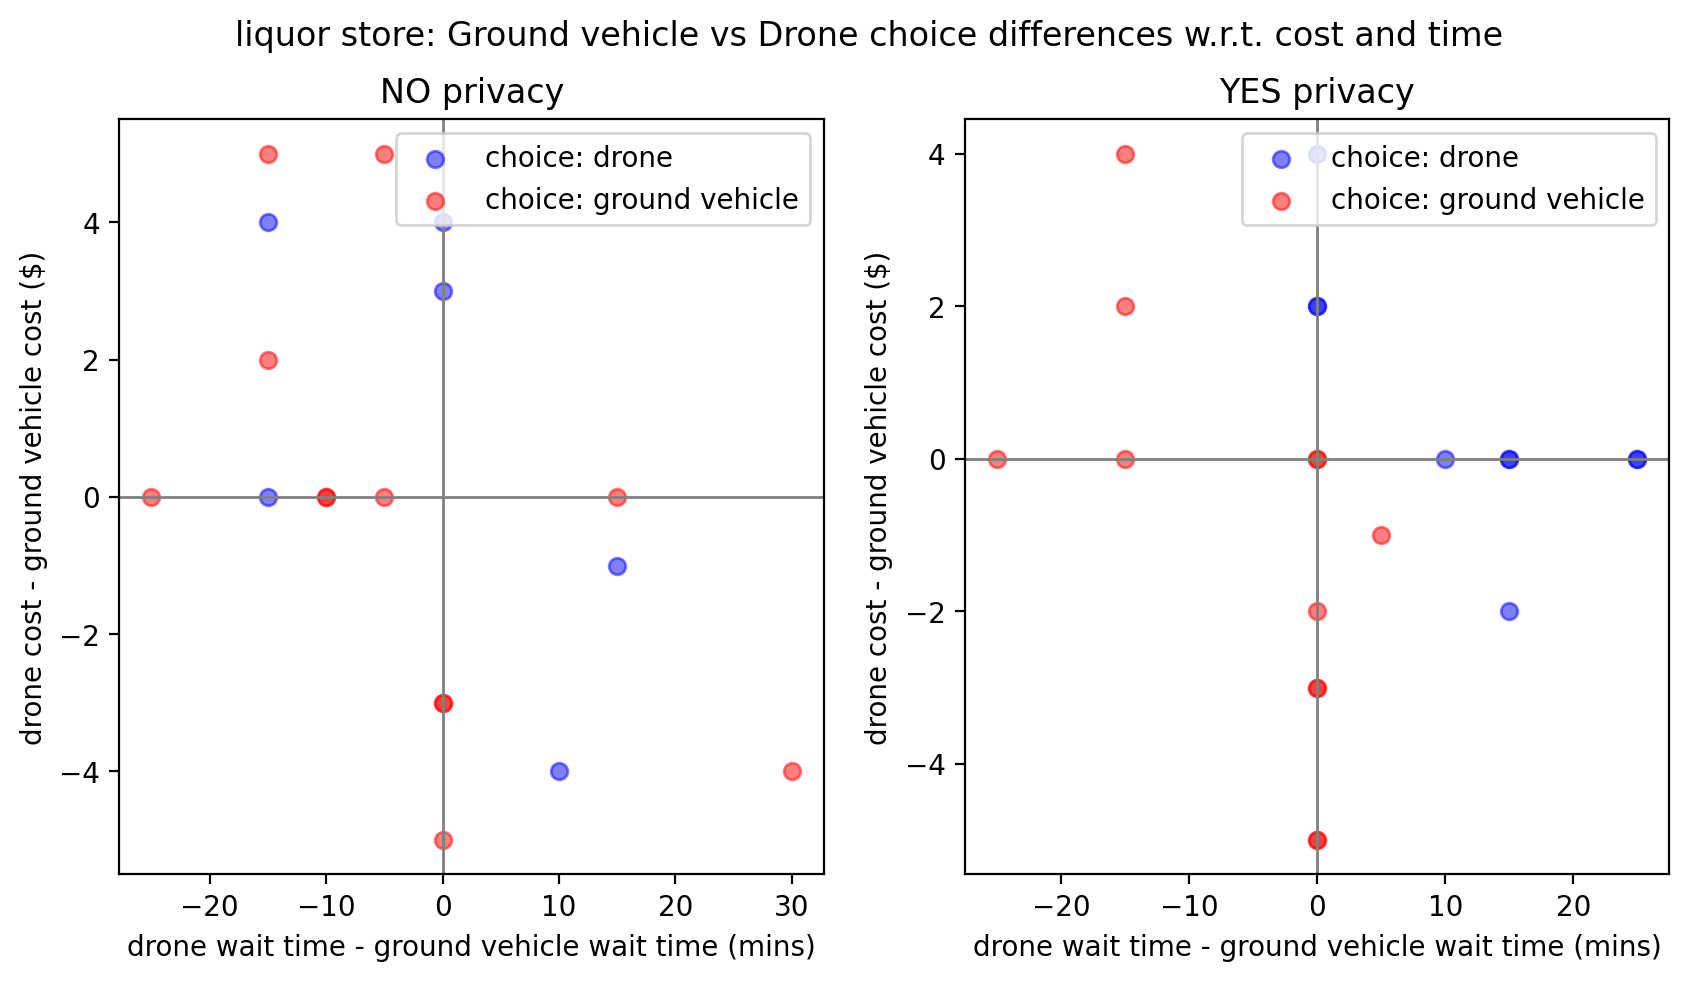

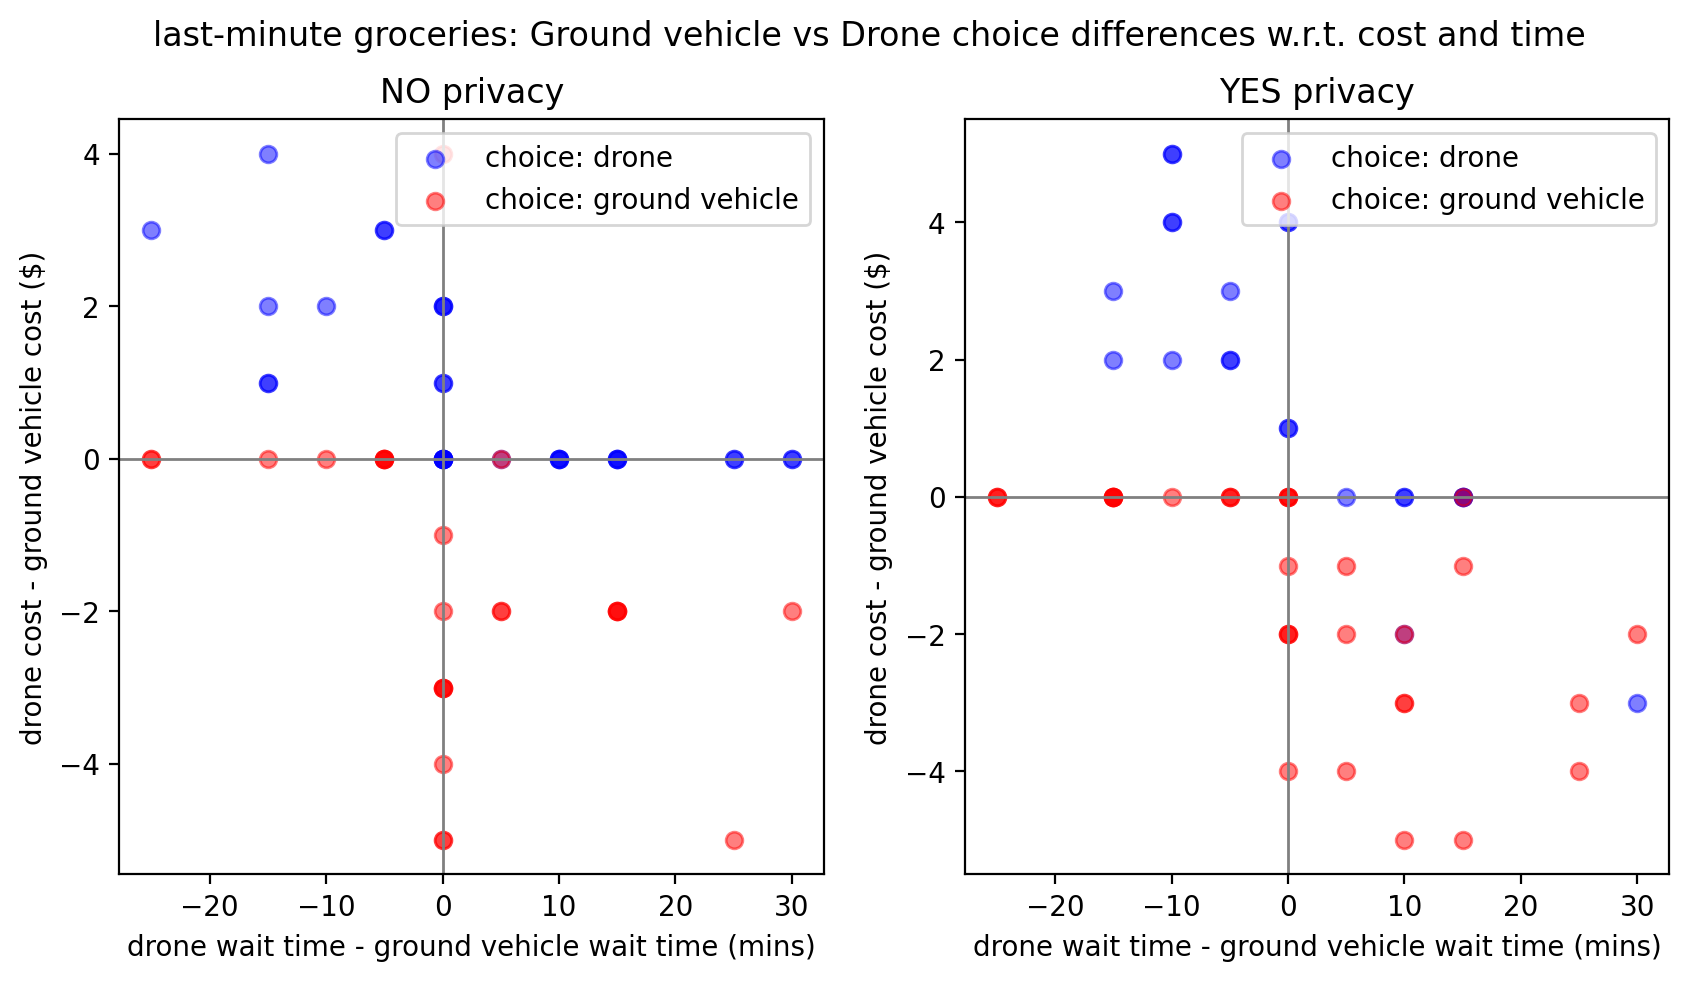

In [21]:
for v, vendor_type in enumerate(VENDOR_TYPES):
    vdf = choices_df[choices_df['v']==v]
    plot_points_tradeoff(vdf, vendor_type[0])

## Dummy models



In [22]:
from pymer4.models import Lmer

In [23]:
choices_df.head(3)

,ResponseId,QID,choice,v,gc,gt,dc,dt,dp,v_type,g_cost,d_cost,g_time,d_time,d_privacy,d_time - g_time,d_cost - g_cost
10,R_OJUdoPVcuz25YD7,CHOICE_v0_gc0_gt0_dc0_dt2_dp0_1,1,0,0,0,0,2,0,take-out food,0,0,15,30,0,15,0
80,R_1ruHrUP2X7OZ8pT,CHOICE_v0_gc0_gt0_dc1_dt0_dp1_1,0,0,0,0,1,0,1,take-out food,0,1,15,15,1,0,1
156,R_1DJ6ctuEtduf99Y,CHOICE_v0_gc0_gt1_dc0_dt2_dp0_1,0,0,0,1,0,2,0,take-out food,0,0,20,30,0,10,0


In [24]:
usecols = [
    'choice',
    'd_time - g_time',
    'd_cost - g_cost',
    'd_privacy',
    'ResponseId'
]
for v, vendor_type in enumerate(VENDOR_TYPES):
    print('\n-----------\nmodel for vendor type v%s: %s\n-----------\n' % (v, vendor_type[0]))
    v_choices_df = choices_df[choices_df['v']==v][usecols]
    # make d_time - g_time, d_cost - g_cost strings that can go in formula
    formula = 'choice ~ d_time_minus_g_time + d_cost_minus_g_cost + d_privacy + (1|ResponseId)'
    m = Lmer(formula, data=v_choices_df.rename(columns={
            'd_time - g_time':'d_time_minus_g_time',
            'd_cost - g_cost':'d_cost_minus_g_cost',
        }), family='binomial')
    print(m.fit())


-----------
model for vendor type v0: take-out food
-----------

Formula: choice~d_time_minus_g_time+d_cost_minus_g_cost+d_privacy+(1|ResponseId)

Family: binomial	 Inference: parametric

Number of observations: 141	 Groups: {'ResponseId': 47.0}

Log-likelihood: -45.534 	 AIC: 101.068

Random effects:

                   Name    Var    Std
ResponseId  (Intercept)  0.615  0.784

No random effect correlations specified

Fixed effects:

                     Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  \
(Intercept)            -0.027  -0.872    0.818  0.431  0.974      0.418   
d_time_minus_g_time    -0.106  -0.168   -0.043  0.032  0.900      0.845   
d_cost_minus_g_cost    -1.632  -2.375   -0.888  0.379  0.196      0.093   
d_privacy               0.359  -0.789    1.507  0.586  1.432      0.454   

                     OR_97.5_ci   Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  \
(Intercept)               2.267  0.493        0.295         0.694  -0.062   
d_time_minus_g_time       0.958

In [25]:
print('rough estimates for value of time ($/mins)')
print('\ntake-out food (d_cost - g_cost) / (d_time - g_time)')
print(-1.632/-0.106)

print('\nprescription meds (d_cost - g_cost) / (d_time - g_time)')
print(-12.553/-0.021)

print('\nliquor store (d_cost - g_cost) / (d_time - g_time)')
print(-14.639/-3.784)

print('\nlast-minute groceries (d_cost - g_cost) / (d_time - g_time)')
print(-1.983/-0.146)

rough estimates for value of time ($/mins)

take-out food (d_cost - g_cost) / (d_time - g_time)
15.39622641509434

prescription meds (d_cost - g_cost) / (d_time - g_time)
597.7619047619048

liquor store (d_cost - g_cost) / (d_time - g_time)
3.8686575052854124

last-minute groceries (d_cost - g_cost) / (d_time - g_time)
13.582191780821919


### Combining data?

Are the above results for v=0,3 similar enough that simple modeling experiments below could combine them?

For initial experiments, in order to set up models with limited data, we assume yes.

In [26]:
v03_choices_df = choices_df[choices_df['v'].isin([0,3])]
print('using choices together for vendor-types:\n%s'%v03_choices_df['v_type'].unique())

using choices together for vendor-types:
['take-out food' 'last-minute groceries']


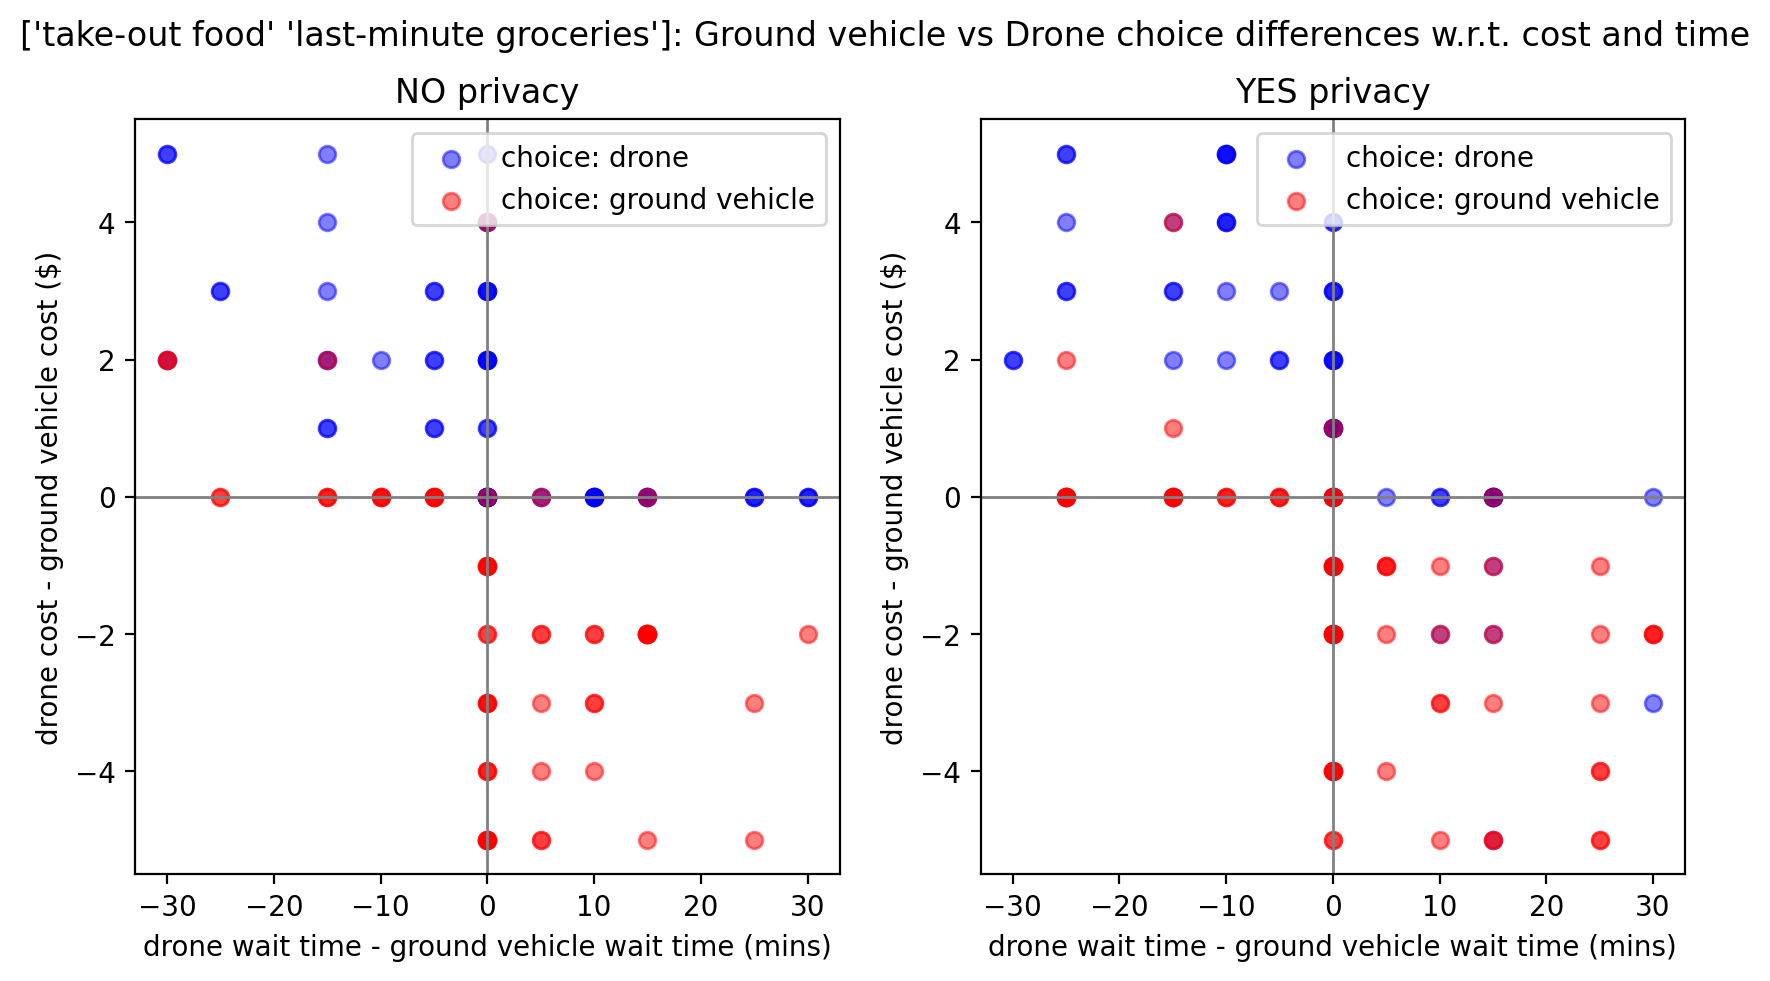

In [27]:
plot_points_tradeoff(v03_choices_df, v03_choices_df['v_type'].unique())

In [28]:
print('----------- model -----------\n')
# v_choices_df = choices_df[choices_df['v']==v][usecols]
# make d_time - g_time, d_cost - g_cost strings that can go in formula
formula = 'choice ~ d_time_minus_g_time + d_cost_minus_g_cost + d_privacy + (1|ResponseId)'
m = Lmer(formula, data=v03_choices_df[usecols].rename(columns={
        'd_time - g_time':'d_time_minus_g_time',
        'd_cost - g_cost':'d_cost_minus_g_cost',
    }), family='binomial')
m.fit()

----------- model -----------

boundary (singular) fit: see ?isSingular 

Formula: choice~d_time_minus_g_time+d_cost_minus_g_cost+d_privacy+(1|ResponseId)

Family: binomial	 Inference: parametric

Number of observations: 261	 Groups: {'ResponseId': 48.0}

Log-likelihood: -83.825 	 AIC: 177.649

Random effects:

                   Name  Var  Std
ResponseId  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-0.198,-0.720,0.324,0.266,0.820,0.487,1.383,0.451,0.327,0.580,-0.744,0.457,
d_time_minus_g_time,-0.118,-0.158,-0.079,0.020,0.888,0.854,0.924,0.470,0.461,0.480,-5.861,0.000,***
d_cost_minus_g_cost,-1.707,-2.148,-1.266,0.225,0.181,0.117,0.282,0.154,0.104,0.220,-7.582,0.000,***
d_privacy,0.623,-0.146,1.391,0.392,1.864,0.864,4.018,0.651,0.464,0.801,1.588,0.112,


## Biogeme

Documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf

TODO: move me to another notebook.
Later, after setting up data processing pipeline.

In [29]:
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
import biogeme.messaging as msg
from biogeme.expressions import (
    Beta,
    DefineVariable,
    bioDraws,
    PanelLikelihoodTrajectory,
    MonteCarlo,
    log,
)

### Initial simple experiments

#### Single vendor

Starting with mixing v0,v3 together.

OR

Starting with v=v2 because it had best model results (significant p-values) using simple dummy model.


#### Generic attributes.
We want to use alternative specific attributes, but start with generic.


#### No mixed model / random parameters
We want to model random effects/taste variation with a random parameter logit model. However, we start without this.


In [30]:
# v=2
v=[0,3]

In [31]:
# Biogeme can only work with respondent IDs as integers
# map respondent IDs to integers as the index where they appear
ids_map = {rid: i for i, rid in enumerate(sample_df['ResponseId'])}
choices_df['ID'] = choices_df['ResponseId'].map(ids_map)
# Also Biogeme requires the IDs to be sorted.
choices_df.sort_values(by='ID', inplace=True)
# ids_map

In [32]:
model_choice_cols = [
    'choice',     # 0=ground vehicle; 1=drone
    'g_cost',     # ground vehicle delivery cost
    'd_cost',     # drone delivery cost
    'g_time',     # ground vehicle delivery wait time
    'd_time',     # drone delivery wait time
    'd_privacy',  # 0=NO PRIVACY; 1=YES PRIVACY (for drone delivery)
    'ID', # respondent ID - to control for
]

In [33]:
model_df = choices_df[choices_df['v'].isin([0,3])][model_choice_cols]
print('choices without excluding free alternatives: N=%s'%len(model_df))
model_df.head(3)

choices without excluding free alternatives: N=261


,choice,g_cost,d_cost,g_time,d_time,d_privacy,ID
24124,1,5,1,30,30,0,11
20032,1,1,0,15,20,1,11
2362,1,1,0,30,30,1,11


In [34]:
database = db.Database('v%s'%v, model_df)
# database.panel('ID') # TODO: use panel later

# The following statement allows you to use the names of variables
# as Python variables.
globals().update(database.variables)
# print(database.variables)
# The Pandas data structure is available as database.data. Use all the
# Pandas functions to invesigate the database
database.data.describe()

,choice,g_cost,d_cost,g_time,d_time,d_privacy,ID
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.528736,2.183908,2.034483,26.532567,26.551724,0.501916,50.942529
std,0.500133,1.884320,1.846712,11.030896,10.615039,0.500957,18.314784
min,0.000000,0.000000,0.000000,15.000000,15.000000,0.000000,11.000000
25%,0.000000,1.000000,0.000000,15.000000,20.000000,0.000000,36.000000
50%,1.000000,1.000000,1.000000,20.000000,20.000000,1.000000,55.000000
75%,1.000000,3.000000,3.000000,30.000000,30.000000,1.000000,66.000000
max,1.000000,5.000000,5.000000,45.000000,45.000000,1.000000,76.000000


In [35]:
# https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# results.data.sampleSize: the sample size N.
# results.data.numberOfObservations: the number of rows in the data file. If the data is not panel, it is the same as the sample size.
# results.data.nparam: the number K of estimated parameters.
# results.data.logLike: the value L∗ of the log likelihood at the final value of the parameters.

def print_biogeme_results(results):
    print('Model: %s' % results.data.modelName)
    print('\n---- Coefficients ----')
    print(results.getEstimatedParameters())
    print('\n---- Model statistics ----\n')
    print('sample size: N=%s' % results.data.sampleSize)
    print('observations: n=%s' % results.data.numberOfObservations)
    print('no. of parameters: K=%s' % results.data.nparam)
    print('log likelihood: LL=%s' % results.data.logLike)
    

In [36]:
# """
# Simple starting model: generic logit
# excludes choices with free delivery alternatives (i.e. cost=0)

# V_groundvehicle = ASC_d + B_cost * g_cost + B_time * g_time
# V_drone =  B_cost * d_cost + B_time * d_time + B_dprivacy * d_privacy
# (drone used as reference for ASC's)

# """

# # Parameters to be estimated
# ASC_G = Beta('ASC_G', 0, None, None, 0)
# ASC_D = Beta('ASC_D', 0, None, None, 1) # 1: this will not change and will make this the reference for ASC's
# B_COST = Beta('B_COST', 0, None, None, 0)
# B_TIME = Beta('B_TIME', 0, None, None, 0)
# B_DPRIVACY = Beta('B_DPRIVACY', 0, None, None, 0)

# # Definition of new variables: adding columns to the database
# G_FREE = DefineVariable('g_free', (g_cost == 0), database)
# D_FREE = DefineVariable('d_free', (d_cost == 0), database)

# # Removing some observations
# exclude = ((G_FREE==1) + (D_FREE==1)) > 0
# database.remove(exclude)

# # To be consistent with Biogeme example -- is any availability indicator ever needed?
# G_AV = 1
# D_AV = 1
# # TODO: potentially scale cost and time values, similar to biogeme examples.
# # From biogeme documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# # Variables can be also be rescaled. For numerical reasons, it is good practice to scale the data so that the values of the estimated parameters are
# # around 1. A previous estimation with the unscaled data has generated parameters around -0.01 for both cost and time. Therefore, time and cost are
# # divided by 100.

# # Definition of the utility functions
# VG = ASC_G + B_COST*g_cost + B_TIME*g_time
# VD = ASC_D + B_COST*d_cost + B_TIME*d_time + B_DPRIVACY*d_privacy 

# # Associate utility functions with the numbering of alternatives
# V = {0: VG, 1: VD}

# # Associate the availability conditions with the alternatives
# av = {0: G_AV, 1: D_AV}

# # Definition of the model. This is the contribution of each
# # observation to the log likelihood function.
# logprob = models.loglogit(V, av, choice)
# # Create the Biogeme object
# biogeme = bio.BIOGEME(database, logprob)
# biogeme.modelName = 'generic_logit_exclude_free_v%s'%v
# # Calculate the null log likelihood for reporting.
# biogeme.calculateNullLoglikelihood(av)
# # Estimate the parameters
# generic_logit_exclude_free_results = biogeme.estimate()
# print_biogeme_results(generic_logit_exclude_free_results)

In [37]:
"""
Generic logit model + modeling effect of free alternatives

V_groundvehicle = ASC_g + B_cost * g_cost + B_free * g_free + B_time * g_time
V_drone =  B_cost * d_cost + B_free * d_free + B_time * d_time + B_dprivacy * d_privacy
(drone used as reference for ASC's)

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""

# Parameters to be estimated
ASC_G = Beta('ASC_G', 0, None, None, 0)
ASC_D = Beta('ASC_D', 0, None, None, 1) # 1: this will not change and will make this the reference for ASC's
B_COST = Beta('B_COST', 0, None, None, 0)
B_FREE = Beta('B_FREE', 0, None, None, 0)
B_TIME = Beta('B_TIME', 0, None, None, 0)
B_DPRIVACY = Beta('B_DPRIVACY', 0, None, None, 0)

# Definition of new variables

# Definition of new variables: NOT adding columns to the database
G_FREE = (g_cost == 0)
D_FREE = (d_cost == 0)
# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1
# TODO: potentially scale cost and time values, similar to biogeme examples.
# From biogeme documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# Variables can be also be rescaled. For numerical reasons, it is good practice to scale the data so that the values of the estimated parameters are
# around 1.

# Definition of the utility functions
VG = ASC_G + B_COST*g_cost + B_FREE*G_FREE + B_TIME*g_time
VD = ASC_D + B_COST*d_cost + B_FREE*D_FREE + B_TIME*d_time + B_DPRIVACY*d_privacy 

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}

# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
logprob = models.loglogit(V, av, choice)
# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'generic_logit_v%s'%v
# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)
# Estimate the parameters
generic_logit_results = biogeme.estimate()
print_biogeme_results(generic_logit_results)

Model: generic_logit_v[0, 3]

---- Coefficients ----
               Value   Std err    t-test       p-value  Rob. Std err  \
ASC_G       0.170682  0.267257  0.638644  5.230548e-01      0.233783   
B_COST     -1.510696  0.234795 -6.434115  1.241944e-10      0.371546   
B_DPRIVACY  0.553837  0.398656  1.389261  1.647535e-01      0.388758   
B_FREE      0.967635  0.551775  1.753678  7.948577e-02      0.554315   
B_TIME     -0.113932  0.019837 -5.743547  9.271361e-09      0.023316   

            Rob. t-test  Rob. p-value  
ASC_G          0.730087      0.465337  
B_COST        -4.065973      0.000048  
B_DPRIVACY     1.424631      0.154264  
B_FREE         1.745642      0.080873  
B_TIME        -4.886526      0.000001  

---- Model statistics ----

sample size: N=261
observations: n=261
no. of parameters: K=5
log likelihood: LL=-82.10266543632972


### Modeling with alternative-specific attributes

#### Generic vs alternative-specific attributes

Specify models with both generic and alternative-specific attributes.

Then use the likelihood ratio test (pages 28 and 164-167 in Ben Akiva & Lerman (1985)) to test which model specification should be used.

Define the restricted model (generic attributes) and unrestricted model (alternative-specific attributes): $M_R$, $M_U$

Test null hypothesis. i.e. for cost and time:

$H_0$ : $\beta_{g\_cost} = \beta_{d\_cost}$ & $\beta_{g\_time} = \beta_{d\_time}$

The test statistic for the null hypothesis is 

$-2(L_R - L_U)$

which is asymtotically distributed as $X^2$ with $df = K_U - K_R$ degrees of freedom, where $K_U$, $K_R$ are the number of estimated parameters in the unrestricted and restricted models.

Reject the null hypothesis that the restrictions are true if 

$-2(L_R - L_U) > X^2_{((1-\alpha),df)}$

where $\alpha$ is the level of significance (use $\alpha=0.05$) and df is degrees of freedom.

In [38]:
"""
Alternative-specific attributes logit model 
    + modeling effect of free alternatives

V_groundvehicle = ASC_g + B_g_cost * g_cost + B_free * g_free + B_g_time * g_time
V_drone =  B_d_cost * d_cost + B_free * d_free + B_d_time * d_time + B_dprivacy * d_privacy
(drone used as reference for ASC's)

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""

# Parameters to be estimated
ASC_G = Beta('ASC_G', 0, None, None, 0)
ASC_D = Beta('ASC_D', 0, None, None, 1) # 1: this will not change and will make this the reference for ASC's
B_G_COST = Beta('B_G_COST', 0, None, None, 0)
B_D_COST = Beta('B_D_COST', 0, None, None, 0)
B_FREE = Beta('B_FREE', 0, None, None, 0) # Assumed generic
B_G_TIME = Beta('B_G_TIME', 0, None, None, 0)
B_D_TIME = Beta('B_D_TIME', 0, None, None, 0)
B_DPRIVACY = Beta('B_DPRIVACY', 0, None, None, 0)

# Definition of new variables

# Definition of new variables: NOT adding columns to the database
G_FREE = (g_cost == 0)
D_FREE = (d_cost == 0)
# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1
# TODO: potentially scale cost and time values, similar to biogeme examples.
# From biogeme documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# Variables can be also be rescaled. For numerical reasons, it is good practice to scale the data so that the values of the estimated parameters are
# around 1.

# Definition of the utility functions
VG = ASC_G + B_G_COST*g_cost + B_FREE*G_FREE + B_G_TIME*g_time
VD = ASC_D + B_D_COST*d_cost + B_FREE*D_FREE + B_D_TIME*d_time + B_DPRIVACY*d_privacy 

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}

# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
logprob = models.loglogit(V, av, choice)
# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'as_logit_v%s'%v
# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)
# Estimate the parameters
as_logit_results = biogeme.estimate()
print_biogeme_results(as_logit_results)

Model: as_logit_v[0, 3]

---- Coefficients ----
               Value   Std err    t-test       p-value  Rob. Std err  \
ASC_G      -0.407282  0.735242 -0.553943  5.796179e-01      0.651261   
B_DPRIVACY  0.512503  0.402210  1.274217  2.025864e-01      0.387516   
B_D_COST   -1.493344  0.239832 -6.226631  4.765703e-10      0.380057   
B_D_TIME   -0.126458  0.023249 -5.439192  5.352280e-08      0.029171   
B_FREE      0.953055  0.555613  1.715321  8.628632e-02      0.569471   
B_G_COST   -1.542313  0.247816 -6.223616  4.858254e-10      0.381615   
B_G_TIME   -0.102065  0.022592 -4.517850  6.247066e-06      0.022494   

            Rob. t-test  Rob. p-value  
ASC_G         -0.625374      0.531725  
B_DPRIVACY     1.322533      0.185991  
B_D_COST      -3.929263      0.000085  
B_D_TIME      -4.335137      0.000015  
B_FREE         1.673579      0.094213  
B_G_COST      -4.041538      0.000053  
B_G_TIME      -4.537430      0.000006  

---- Model statistics ----

sample size: N=261
observa

Perform the likelihood ratio test

In [39]:
K_R = generic_logit_results.data.nparam
K_U = as_logit_results.data.nparam
df = K_U - K_R
print('df=%s'%df)

L_R = generic_logit_results.data.logLike
L_U = as_logit_results.data.logLike
test_stat = -2*(L_R - L_U)
print('−2(L_R - L_U)=%0.4f' % test_stat)
print('X_2,0.05 = 5.99')
if test_stat > 5.99:
    print('can reject the null hypothesis')
else:
    print('cannot reject the null hypothesis')

df=2
−2(L_R - L_U)=1.3033
X_2,0.05 = 5.99
cannot reject the null hypothesis


Mixed Logit / Random Paramater Logit Model (RPLM)

Here the parameters for time, cost, and the ASC's are randomly
distributed with a normal distribution.

For the ASCs:
The normalization is not arbitrary. Only the minimum variance alternative should be normalized to 0. Therefore, proper estimation first requires the unidentified model be estimated (with all 2 variances in this case). Then the model should be re-estimated with the smallest variance from the unidentified model normalized to 0.

We therefore do this in 2 stages below.

1. Estimate all variances
2. Fix minimum variance alternative to 0. Also use the parameter values from (1) as starting values for faster estimation.

For 1,2, see Biogeme's files for example: 12panel,13panel.


In [40]:
"""
This is the same as the above alternative-specific attributes logit model 
with random parameters
The parameters for the ASC's, time and cost are randomly distributed 
across the population with a normal distribution.

1. estimated all variances to identify minimum variance alternative.

V_groundvehicle = ASC_g + B_g_cost * g_cost + B_free * g_free + B_g_time * g_time
V_drone =  ASC_d + B_d_cost * d_cost + B_free * d_free + B_d_time * d_time + B_dprivacy * d_privacy
(drone used as reference for ASC's)

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""

# Parameters to be estimated:
# Define random parameters, normally distributed across individuals,
# designed to be used for Monte-Carlo simulation
ASC_G_MEAN = Beta('ASC_G_MEAN', 0, None, None, 0)
ASC_G_S = Beta('ASC_G_S', 1, None, None, 0)
ASC_G_RND = ASC_G_MEAN + ASC_G_S * bioDraws('ASC_G_RND', 'NORMAL_ANTI')

ASC_D_MEAN = Beta('ASC_D_MEAN', 0, None, None, 1) # initially fixed as reference
ASC_D_S = Beta('ASC_D_S', 1, None, None, 0)
ASC_D_RND = ASC_D_MEAN + ASC_D_S * bioDraws('ASC_D_RND', 'NORMAL_ANTI')

B_G_COST_MEAN = Beta('B_G_COST_MEAN', 0, None, None, 0)
B_G_COST_S = Beta('B_G_COST_S', 1, None, None, 0)
B_G_COST_RND = B_G_COST_MEAN + B_G_COST_S * bioDraws('B_G_COST_RND', 'NORMAL_ANTI')

B_D_COST_MEAN = Beta('B_D_COST_MEAN', 0, None, None, 0)
B_D_COST_S = Beta('B_D_COST_S', 1, None, None, 0)
B_D_COST_RND = B_D_COST_MEAN + B_D_COST_S * bioDraws('B_D_COST_RND', 'NORMAL_ANTI')

# Assumed generic
B_FREE_MEAN = Beta('B_FREE_MEAN', 0, None, None, 0) 
B_FREE_S = Beta('B_FREE_S', 1, None, None, 0)
B_FREE_RND = B_FREE_MEAN + B_FREE_S * bioDraws('B_FREE_RND', 'NORMAL_ANTI')

B_G_TIME_MEAN = Beta('B_G_TIME_MEAN', 0, None, None, 0)
B_G_TIME_S = Beta('B_G_TIME_S', 1, None, None, 0)
B_G_TIME_RND = B_G_TIME_MEAN + B_G_TIME_S * bioDraws('B_G_TIME_RND', 'NORMAL_ANTI')

B_D_TIME_MEAN = Beta('B_D_TIME_MEAN', 0, None, None, 0)
B_D_TIME_S = Beta('B_D_TIME_S', 1, None, None, 0)
B_D_TIME_RND = B_D_TIME_MEAN + B_D_TIME_S * bioDraws('B_D_TIME_RND', 'NORMAL_ANTI')

B_DPRIVACY_MEAN = Beta('B_DPRIVACY_MEAN', 0, None, None, 0)
B_DPRIVACY_S = Beta('B_DPRIVACY_S', 1, None, None, 0)
B_DPRIVACY_RND = B_DPRIVACY_MEAN + B_DPRIVACY_S * bioDraws('B_DPRIVACY_RND', 'NORMAL_ANTI')

# Definition of new variables

# Definition of new variables: NOT adding columns to the database
G_FREE = (g_cost == 0)
D_FREE = (d_cost == 0)
# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1

# From biogeme documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# Variables can be also be rescaled. For numerical reasons, it is good practice to scale the data so that the values of the estimated parameters are
# around 1.
# We might scale the parameters here because they were found to be near 100
# (This only occured after adding the random components)
g_cost_scaled = g_cost# * 100.0
d_cost_scaled = d_cost# * 100.0
g_time_scaled = g_time# * 100.0
d_time_scaled = d_time# * 100.0

# Definition of the utility functions
VG = ASC_G_RND + B_G_COST_RND*g_cost_scaled + B_FREE_RND*G_FREE + B_G_TIME_RND*g_time_scaled
VD = ASC_D_RND + B_D_COST_RND*d_cost_scaled + B_FREE_RND*D_FREE + B_D_TIME_RND*d_time_scaled + B_DPRIVACY_RND*d_privacy 

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}
# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.

# Conditional to the random parameters
prob = models.logit(V, av, choice)
# We integrate over the random parameters using Monte-Carlo
logprob = log(MonteCarlo(prob))

# Define level of verbosity
logger = msg.bioMessage()
# logger.setSilent() #.setWarning()
logger.setWarning() # .setGeneral() .setDetailed() << other options for messages

# Create the Biogeme object
biogeme = bio.BIOGEME(
    database, 
    logprob, 
    #numberOfDraws=100000, 
    numberOfDraws=10000,#100000, 
    #numberOfDraws=100,
    userNotes=(
        'Initial estimation of RPLM. Rerun this model where the minimum '
        'variance ASC is fixed to 0.'
    )
)
biogeme.modelName = 'RPLM1_v%s'%v

print('start time: %s' % time.strftime("%H:%M:%S", time.localtime()))
# Estimate the parameters
rplm1_results = biogeme.estimate()
print('end time: %s' % time.strftime("%H:%M:%S", time.localtime()))
print_biogeme_results(rplm1_results)

start time: 23:14:57
end time: 00:47:41
Model: RPLM1_v[0, 3]

---- Coefficients ----
                      Value      Std err    t-test   p-value  Rob. Std err  \
ASC_D_S            5.274678    24.058279  0.219246  0.826459      3.948259   
ASC_G_MEAN       -47.990180   189.516450 -0.253224  0.800095     36.084017   
ASC_G_S           11.578124    44.525771  0.260032  0.794839     16.531981   
B_DPRIVACY_MEAN  117.982822   440.081942  0.268093  0.788628    184.748158   
B_DPRIVACY_S     -33.975381   131.193851 -0.258971  0.795658     51.076940   
B_D_COST_MEAN   -259.550496   996.843474 -0.260372  0.794577    360.167792   
B_D_COST_S        72.151194   278.055337  0.259485  0.795261     98.515300   
B_D_TIME_MEAN    -21.684055    83.745039 -0.258929  0.795690     29.341197   
B_D_TIME_S        -6.777735    26.096845 -0.259715  0.795084      9.399910   
B_FREE_MEAN       90.400923   327.348268  0.276161  0.782424    148.305369   
B_FREE_S          13.006909    52.950460  0.245643  0.805

Step 2: Re-estimate the above model

Normalize the ASC for the minimum variance alternative to 0.

Use estimated parameter values as starting values for more efficient estimation.

In [41]:
rplm1_betas = {b.name: b.value for b in rplm1_results.data.betas}
# rplm1_betas

In [42]:
# determine the minimum variance alternative
print('ASC_G_S =', rplm1_betas['ASC_G_S'])
print('ASC_D_S =', rplm1_betas['ASC_D_S'])

ASC_G_S = 11.578124439622746
ASC_D_S = 5.274678333252438


In [43]:
for b_name, b_value in rplm1_betas.items():
    if 'MEAN' in b_name:
        print(b_name, b_value)

ASC_G_MEAN -47.99017975847584
B_DPRIVACY_MEAN 117.98282167964506
B_D_COST_MEAN -259.5504963205731
B_D_TIME_MEAN -21.684055276189742
B_FREE_MEAN 90.40092261057956
B_G_COST_MEAN -269.4559662083488
B_G_TIME_MEAN -17.809129218469323


In [44]:
"""
2. estimated all variances to identify minimum variance alternative.
"""

# Parameters to be estimated:
# Define random parameters, normally distributed across individuals,
# designed to be used for Monte-Carlo simulation
ASC_G_MEAN = Beta('ASC_G_MEAN', rplm1_betas['ASC_G_MEAN'], None, None, 0)
ASC_G_S = Beta('ASC_G_S', 1, None, None, 0)
ASC_G_RND = ASC_G_MEAN + ASC_G_S * bioDraws('ASC_G_RND', 'NORMAL_ANTI')

ASC_D_MEAN = Beta('ASC_D_MEAN', 0, None, None, 0)
ASC_D_S = Beta('ASC_D_S', 1, None, None, 0)
ASC_D_RND = ASC_D_MEAN + ASC_D_S * bioDraws('ASC_D_RND', 'NORMAL_ANTI')

B_G_COST_MEAN = Beta('B_G_COST_MEAN', rplm1_betas['B_G_COST_MEAN'], None, None, 0)
B_G_COST_S = Beta('B_G_COST_S', 1, None, None, 0)
B_G_COST_RND = B_G_COST_MEAN + B_G_COST_S * bioDraws('B_G_COST_RND', 'NORMAL_ANTI')

B_D_COST_MEAN = Beta('B_D_COST_MEAN', rplm1_betas['B_D_COST_MEAN'], None, None, 0)
B_D_COST_S = Beta('B_D_COST_S', 1, None, None, 0)
B_D_COST_RND = B_D_COST_MEAN + B_D_COST_S * bioDraws('B_D_COST_RND', 'NORMAL_ANTI')

# Assumed generic
B_FREE_MEAN = Beta('B_FREE_MEAN', rplm1_betas['B_FREE_MEAN'], None, None, 0) 
B_FREE_S = Beta('B_FREE_S', 1, None, None, 0)
B_FREE_RND = B_FREE_MEAN + B_FREE_S * bioDraws('B_FREE_RND', 'NORMAL_ANTI')

B_G_TIME_MEAN = Beta('B_G_TIME_MEAN', rplm1_betas['B_G_TIME_MEAN'], None, None, 0)
B_G_TIME_S = Beta('B_G_TIME_S', 1, None, None, 0)
B_G_TIME_RND = B_G_TIME_MEAN + B_G_TIME_S * bioDraws('B_G_TIME_RND', 'NORMAL_ANTI')

B_D_TIME_MEAN = Beta('B_D_TIME_MEAN', rplm1_betas['B_D_TIME_MEAN'], None, None, 0)
B_D_TIME_S = Beta('B_D_TIME_S', 1, None, None, 0)
B_D_TIME_RND = B_D_TIME_MEAN + B_D_TIME_S * bioDraws('B_D_TIME_RND', 'NORMAL_ANTI')

B_DPRIVACY_MEAN = Beta('B_DPRIVACY_MEAN', rplm1_betas['B_DPRIVACY_MEAN'], None, None, 0)
B_DPRIVACY_S = Beta('B_DPRIVACY_S', 1, None, None, 0)
B_DPRIVACY_RND = B_DPRIVACY_MEAN + B_DPRIVACY_S * bioDraws('B_DPRIVACY_RND', 'NORMAL_ANTI')

# Definition of new variables

# Definition of new variables: NOT adding columns to the database
G_FREE = (g_cost == 0)
D_FREE = (d_cost == 0)
# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1
# TODO: potentially scale cost and time values, similar to biogeme examples.
# From biogeme documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# Variables can be also be rescaled. For numerical reasons, it is good practice to scale the data so that the values of the estimated parameters are
# around 1.

# Definition of the utility functions
# TODO: Omit the ASC for the minimum variance alternative, depending on above results
VG = ASC_G_RND + B_G_COST_RND*g_cost + B_FREE_RND*G_FREE + B_G_TIME_RND*g_time
VD = B_D_COST_RND*d_cost + B_FREE_RND*D_FREE + B_D_TIME_RND*d_time + B_DPRIVACY_RND*d_privacy 
# OR
# VG = B_G_COST_RND*g_cost + B_FREE_RND*G_FREE + B_G_TIME_RND*g_time
# VD = ASC_D_RND + B_D_COST_RND*d_cost + B_FREE_RND*D_FREE + B_D_TIME_RND*d_time + B_DPRIVACY_RND*d_privacy 

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}
# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.

# Conditional to the random parameters
prob = models.logit(V, av, choice)
# We integrate over the random parameters using Monte-Carlo
logprob = log(MonteCarlo(prob))

# Define level of verbosity
logger = msg.bioMessage()
# logger.setSilent() #.setWarning()
logger.setWarning() # .setGeneral() .setDetailed() << other options for messages

# Create the Biogeme object
biogeme = bio.BIOGEME(
    database, 
    logprob, 
    numberOfDraws=10000,#100000, 
    userNotes=('Second estimation of RPLM using results from first estimation')
)
biogeme.modelName = 'RPLM2_v%s'%v

# Estimate the parameters
print('start time: %s' % time.strftime("%H:%M:%S", time.localtime()))
rplm2_results = biogeme.estimate()
print('end time: %s' % time.strftime("%H:%M:%S", time.localtime()))
print_biogeme_results(rplm2_results)

start time: 00:47:51
[00:47:51] < Warning >   Cannot read file __RPLM2_v[0, 3].iter. Statement is ignored.


biogemeError: The norm of the gradient is inf: g=[-1.79769313e+308 -1.79769313e+308 -1.79769313e+308 -1.79769313e+308
 -1.79769313e+308 -1.79769313e+308 -1.79769313e+308 -1.79769313e+308
 -1.79769313e+308 -1.79769313e+308 -1.79769313e+308 -1.79769313e+308
 -1.79769313e+308 -1.79769313e+308]

### Panel data

In [ ]:
database.panel("ID")
database.data.describe()

In [ ]:
"""
This is the same as the above alternative-specific attributes logit model 
with random parameters

The parameters for the ASC's, time and cost are randomly distributed 
across the population with a normal distribution.

1. estimated all variances to identify minimum variance alternative.

V_groundvehicle = ASC_g + B_g_cost * g_cost + B_free * g_free + B_g_time * g_time
V_drone =  ASC_d + B_d_cost * d_cost + B_free * d_free + B_d_time * d_time + B_dprivacy * d_privacy
(drone used as reference for ASC's)

g_free/d_free are dummy variables indicating whether there is a delivery cost:
    0=not free; 1=free

"""

# Parameters to be estimated:
# Define random parameters, normally distributed across individuals,
# designed to be used for Monte-Carlo simulation
ASC_G_MEAN = Beta('ASC_G_MEAN', 0, None, None, 0)
ASC_G_S = Beta('ASC_G_S', 1, None, None, 0)
ASC_G_RND = ASC_G_MEAN + ASC_G_S * bioDraws('ASC_G_RND', 'NORMAL_ANTI')

ASC_D_MEAN = Beta('ASC_D_MEAN', 0, None, None, 1) # initially fixed as reference
ASC_D_S = Beta('ASC_D_S', 1, None, None, 0)
ASC_D_RND = ASC_D_MEAN + ASC_D_S * bioDraws('ASC_D_RND', 'NORMAL_ANTI')

B_G_COST_MEAN = Beta('B_G_COST_MEAN', 0, None, None, 0)
B_G_COST_S = Beta('B_G_COST_S', 1, None, None, 0)
B_G_COST_RND = B_G_COST_MEAN + B_G_COST_S * bioDraws('B_G_COST_RND', 'NORMAL_ANTI')

B_D_COST_MEAN = Beta('B_D_COST_MEAN', 0, None, None, 0)
B_D_COST_S = Beta('B_D_COST_S', 1, None, None, 0)
B_D_COST_RND = B_D_COST_MEAN + B_D_COST_S * bioDraws('B_D_COST_RND', 'NORMAL_ANTI')

# Assumed generic
B_FREE_MEAN = Beta('B_FREE_MEAN', 0, None, None, 0) 
B_FREE_S = Beta('B_FREE_S', 1, None, None, 0)
B_FREE_RND = B_FREE_MEAN + B_FREE_S * bioDraws('B_FREE_RND', 'NORMAL_ANTI')

B_G_TIME_MEAN = Beta('B_G_TIME_MEAN', 0, None, None, 0)
B_G_TIME_S = Beta('B_G_TIME_S', 1, None, None, 0)
B_G_TIME_RND = B_G_TIME_MEAN + B_G_TIME_S * bioDraws('B_G_TIME_RND', 'NORMAL_ANTI')

B_D_TIME_MEAN = Beta('B_D_TIME_MEAN', 0, None, None, 0)
B_D_TIME_S = Beta('B_D_TIME_S', 1, None, None, 0)
B_D_TIME_RND = B_D_TIME_MEAN + B_D_TIME_S * bioDraws('B_D_TIME_RND', 'NORMAL_ANTI')

B_DPRIVACY_MEAN = Beta('B_DPRIVACY_MEAN', 0, None, None, 0)
B_DPRIVACY_S = Beta('B_DPRIVACY_S', 1, None, None, 0)
B_DPRIVACY_RND = B_DPRIVACY_MEAN + B_DPRIVACY_S * bioDraws('B_DPRIVACY_RND', 'NORMAL_ANTI')

# Definition of new variables

# Definition of new variables: NOT adding columns to the database
G_FREE = (g_cost == 0)
D_FREE = (d_cost == 0)
# To be consistent with Biogeme example -- is any availability indicator ever needed?
G_AV = 1
D_AV = 1

# From biogeme documentation: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf
# Variables can be also be rescaled. For numerical reasons, it is good practice to scale the data so that the values of the estimated parameters are
# around 1.
# We might scale the parameters here because they were found to be near 100
# (This only occured after adding the random components)
# Note these are global variables so don't try rescaling them. 
# Can also create new variables in the database.
g_cost_scaled = g_cost# * 100.0
d_cost_scaled = d_cost# * 100.0
g_time_scaled = g_time# * 100.0
d_time_scaled = d_time# * 100.0

# Definition of the utility functions
VG = ASC_G_RND + B_G_COST_RND*g_cost_scaled + B_FREE_RND*G_FREE + B_G_TIME_RND*g_time_scaled
VD = ASC_D_RND + B_D_COST_RND*d_cost_scaled + B_FREE_RND*D_FREE + B_D_TIME_RND*d_time_scaled + B_DPRIVACY_RND*d_privacy 

# Associate utility functions with the numbering of alternatives
V = {0: VG, 1: VD}
# Associate the availability conditions with the alternatives
av = {0: G_AV, 1: D_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.

# Conditional to the random parameters, the likelihood of one observation
obsprob = models.logit(V, av, choice)
# Conditional to the random parameters, the likelihood of all observations for
# one individual (the trajectory) is the product of the likelihood of
# each observation.
condprobIndiv = PanelLikelihoodTrajectory(obsprob)
# We integrate over the random parameters using Monte-Carlo
logprob = log(MonteCarlo(condprobIndiv))

# Define level of verbosity
logger = msg.bioMessage()
# logger.setSilent() #.setWarning()
logger.setWarning() # .setGeneral() .setDetailed() << other options for messages

# Create the Biogeme object
biogeme = bio.BIOGEME(
    database, 
    logprob, 
    numberOfDraws=10000,#100000, 
    userNotes=(
        'Initial estimation of RPLM. Rerun this model where the minimum '
        'variance ASC is fixed to 0.'
    )
)
biogeme.modelName = 'RPLM_panel1_v%s'%v

# Estimate the parameters
rplm_panel1_results = biogeme.estimate()
print_biogeme_results(rplm_panel1_results)